<a href="https://colab.research.google.com/github/Shingirai98/Xhosa_English_Translation/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
# library imports
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from IPython.display import HTML
from google.colab import data_table

In [4]:
def var_init(tag):
  source_language = "en"
  target_language = "xh"
  os.environ["src"] = source_language # Sets them in bash as well, since we often use bash scripts
  os.environ["tgt"] = target_language
  os.environ["tag"] = tag
  tag = tag
  os.environ["gdrive_path"] = "/content/drive/My Drive/m/%s-%s-%s" % (target_language, source_language, tag)


In [71]:
vars = ["noam_0.65lr","baseline-noam", "baseline_10epochs", "baseline", "noam_0.35lr","noam_df.9"]

In [6]:
var_init(vars[1])
!echo $gdrive_path

/content/drive/My Drive/m/xh-en-baseline-noam


In [7]:
def check_float(potential_float):
    try:
        float(potential_float)
        return True
    except ValueError:
        return False


In [49]:
def toDataFrame(val):
  vals = []
  steps = []
  loss = []
  ppl = []
  bleu_score = []
  with open(val) as f:
    for i, line in enumerate(f):
      for word in line.split():
        if check_float(word):
          vals.append(float(word))
        elif word.isdigit():
          vals.append(int(word))

  for i in range(0, len(vals)//5):
    steps.append(vals[5*i])
    loss.append(vals[(5*i)+1])
    ppl.append(vals[(5*i)+2])
    bleu_score.append(vals[(5*i)+3])

  data = {'Steps': steps, 'Loss': loss, 'PPL': ppl, 'bleu':bleu_score}
  df = pd.DataFrame(data) 
  return df

In [15]:
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 1:
    color = 'red'
  elif value >= 1 and value < 5:
    color = 'yellow'
  else:
    color = 'green'

  return 'color: %s' % color

In [50]:
def disp_tab(current_var):
  val = "drive/My Drive/m/xh-en-"+current_var+"/models/xhen_reverse_transformer/validations.txt"
  table1 = toDataFrame(val)
  
  data_table.enable_dataframe_formatter()
  return table1

In [54]:
def disp_plot(current_var):
  ax = plt.gca()
  val = "drive/My Drive/m/xh-en-"+current_var+"/models/xhen_reverse_transformer/validations.txt"
  table1 = toDataFrame(val)
  table1.plot(kind='line',x='Steps',y='bleu',ax=ax)
  plt.xlabel('Number of Steps')
  plt.ylabel('BLEU score')
  plt.title(current_var)

  plt.legend()

In [41]:
# source_file = 'xhosanavy.' + source_language
# target_file = 'xhosanavy.' + target_language

# lr = []
current_var = vars[1]
disp_tab(current_var)

,Steps,Loss,PPL,bleu
0,1000.0,109041.10156,73.91766,0.19118
1,2000.0,93268.50781,39.66772,1.56570
2,3000.0,85527.91406,29.22663,2.32087
3,4000.0,80839.14844,24.28973,3.60188
4,5000.0,77384.58594,21.19426,4.12418
5,6000.0,74894.38281,19.21061,5.16321
6,7000.0,72969.06250,17.80512,5.78062
7,8000.0,71347.20312,16.70127,6.01452


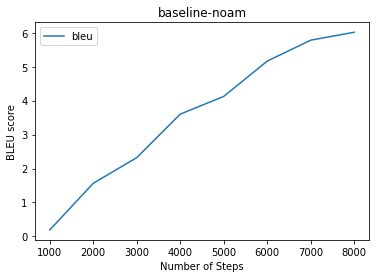

In [31]:
disp_plot(current_var)

In [60]:
df = disp_tab(vars[2])
df.head(5)


,Steps,Loss,PPL,bleu
0,1000.0,112401.50000,84.39928,0.31721
1,2000.0,99845.14062,51.42185,0.80554
2,3000.0,91615.40625,37.16262,1.80184
3,4000.0,85857.57031,29.60932,2.66721
4,5000.0,81840.14844,25.26841,3.06048


In [59]:
df.tail(5)

,Steps,Loss,PPL,bleu
21,22000.0,59594.57812,10.50347,11.76584
22,23000.0,59046.58594,10.27878,11.62610
23,24000.0,58398.76953,10.01934,12.43508
24,25000.0,57910.75781,9.82824,12.91821
25,26000.0,57375.89453,9.62297,13.01399


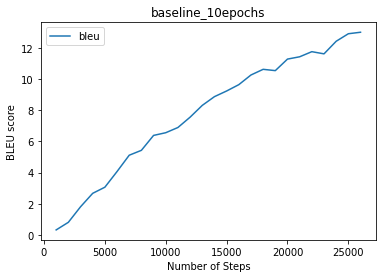

In [55]:
disp_plot(vars[2])

In [56]:
disp_tab(vars[3])

,Steps,Loss,PPL,bleu
0,1000.0,112401.50000,84.39928,0.31721
1,2000.0,99845.14062,51.42185,0.80554
2,3000.0,91615.40625,37.16262,1.80184
3,4000.0,85857.57031,29.60932,2.66721
4,5000.0,81840.14844,25.26841,3.06048
5,6000.0,78571.08594,22.21020,4.06724
6,7000.0,75983.10156,20.05394,5.11519
7,8000.0,74091.54688,18.61153,5.42913


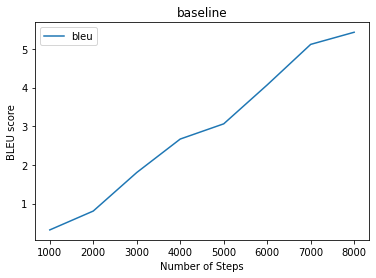

In [57]:
disp_plot(vars[3])

In [61]:
disp_tab(vars[0])

,Steps,Loss,PPL,bleu
0,1000.0,107506.36719,69.57385,0.20796
1,2000.0,93039.58594,39.31099,1.46233
2,3000.0,85724.65625,29.45443,2.23058
3,4000.0,80888.46094,24.33704,3.24241
4,5000.0,77325.76562,21.14513,3.72451
5,6000.0,74717.91406,19.07730,4.43925
6,7000.0,72859.25000,17.72813,4.90788
7,8000.0,71176.64844,16.58924,5.39422


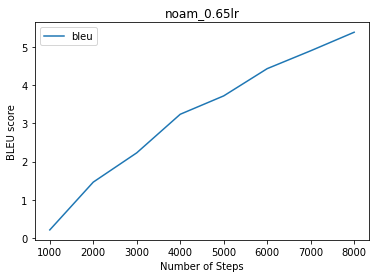

In [62]:
disp_plot(vars[0])

In [67]:
disp_tab(vars[4])

,Steps,Loss,PPL,bleu
0,1000.0,107506.36719,69.57385,0.20796
1,2000.0,93039.58594,39.31099,1.46233
2,3000.0,85724.65625,29.45443,2.23058
3,4000.0,80888.46094,24.33704,3.24241
4,5000.0,77325.76562,21.14513,3.72451
5,6000.0,74717.91406,19.07730,4.43925
6,7000.0,72859.25000,17.72813,4.90788
7,8000.0,71176.64844,16.58924,5.39422


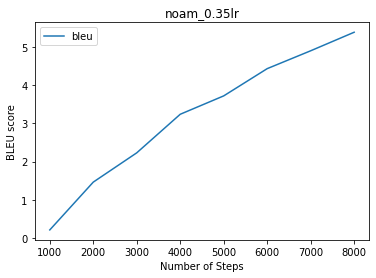

In [68]:
disp_plot(vars[4])

In [72]:
disp_tab(vars[5])

,Steps,Loss,PPL,bleu
0,1000.0,109041.10156,73.91766,0.19118
1,2000.0,93268.50781,39.66772,1.56570
2,3000.0,85527.91406,29.22663,2.32087
3,4000.0,80839.14844,24.28973,3.60188
4,5000.0,77384.58594,21.19426,4.12418
5,6000.0,74894.38281,19.21061,5.16321
6,7000.0,72969.06250,17.80512,5.78062
7,8000.0,71347.20312,16.70127,6.01452


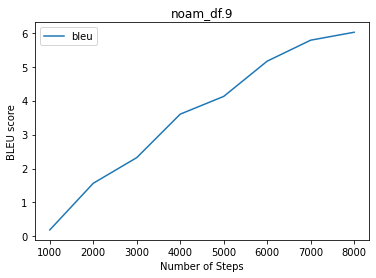

In [73]:
disp_plot(vars[5])